Importar base de dados

In [6]:
import pandas as pd

# armazenando o "advertising" na variável tabela
tabela = pd.read_csv("advertising.csv")

# mostrando a tabela
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

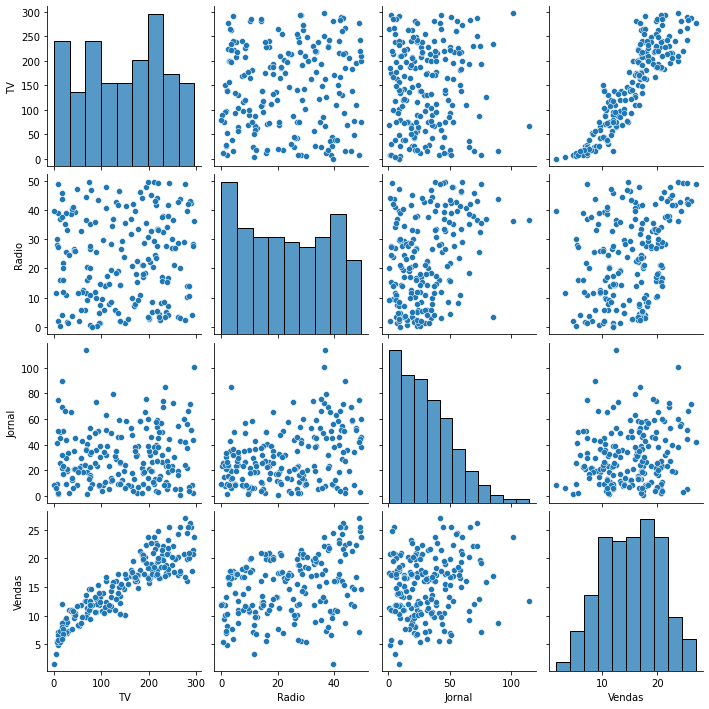

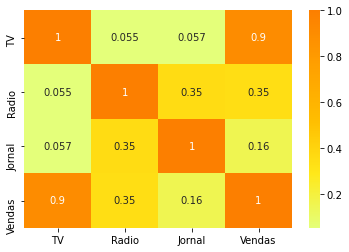

In [11]:
# bibliotecas de gráfico
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
plt.show()

In [17]:
# separando em dados de treino e dados de teste
from sklearn.model_selection import train_test_split

x = tabela.drop("Vendas", axis=1)
y = tabela["Vendas"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligência artificial
linear = LinearRegression()
randomforest = RandomForestRegressor()

# treinar a inteligência artificial
linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

In [21]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

# r2
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(r2_linear, r2_random)

# erro
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_linear)
print(erro_linear, erro_random)

0.913270136199003 0.9307072553059265
2.029439061755754 2.029439061755754


,Vendas Reais,Previsao Random
0,17.1,18.751
1,7.2,7.403
2,11.3,11.686
3,24.7,22.849
4,27.0,25.368
5,11.9,12.553
6,19.7,19.698
7,5.3,5.751
8,18.0,19.166
9,18.4,19.385


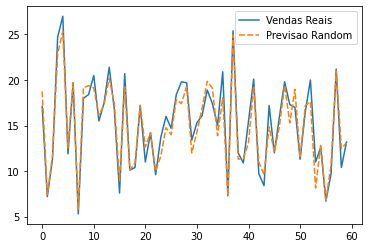

In [22]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_teste
tabela_comparacao["Previsao Random"] = teste_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

display(tabela_comparacao)
sns.lineplot(data=tabela_comparacao)
plt.show()

In [25]:
print(randomforest.feature_importances_)
print("TV", "Radio", "Jornal")

[0.86479662 0.11971653 0.01548684]
TV Radio Jornal


In [26]:
print(tabela[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
